In [1]:
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### SimpleRNN

只返回最后一个时间步的输出`(batch_size, output_features)`：

In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


返回每个时间步连续输出的完整序列`(batch_size, timesteps, output_features)`：

In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


为提高网络的表示能力，将多个循环层逐个堆叠有时也很有用。这种情况下，需要让所有中间层都返回完整的输出序列。

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))   # 最后一层仅返回最终输出
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


**将模型应用于IMDB电影评论分类问题。**

In [5]:
# Load the data and preprocess
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000   # 作为特征的单词个数
maxlen = 500   # 在500个单词后截断文本
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

25000 train sequences
25000 test sequences


In [6]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [7]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6480 - acc: 0.6089 - val_loss: 0.5536 - val_acc: 0.7348
Epoch 2/10
20000/20000 [==============================] - 19s 944us/step - loss: 0.4110 - acc: 0.8235 - val_loss: 0.4287 - val_acc: 0.8092
Epoch 3/10
20000/20000 [==============================] - 19s 926us/step - loss: 0.3034 - acc: 0.8777 - val_loss: 0.4077 - val_acc: 0.8154
Epoch 4/10
20000/20000 [==============================] - 19s 926us/step - loss: 0.2194 - acc: 0.9179 - val_loss: 0.4230 - val_acc: 0.8302
Epoch 5/10
20000/20000 [==============================] - 19s 927us/step - loss: 0.1455 - acc: 0.9471 - val_loss: 0.3929 - val_acc: 0.8708
Epoch 6/10
20000/20000 [==============================] - 19s 933us/step - loss: 0.0850 - acc: 0.9723 - val_loss: 0.4564 - val_acc: 0.8258
Epoch 7/10
20000/20000 [==============================] - 18s 925us/step - loss: 0.0545 - acc: 0.9834 - val_loss: 0.550

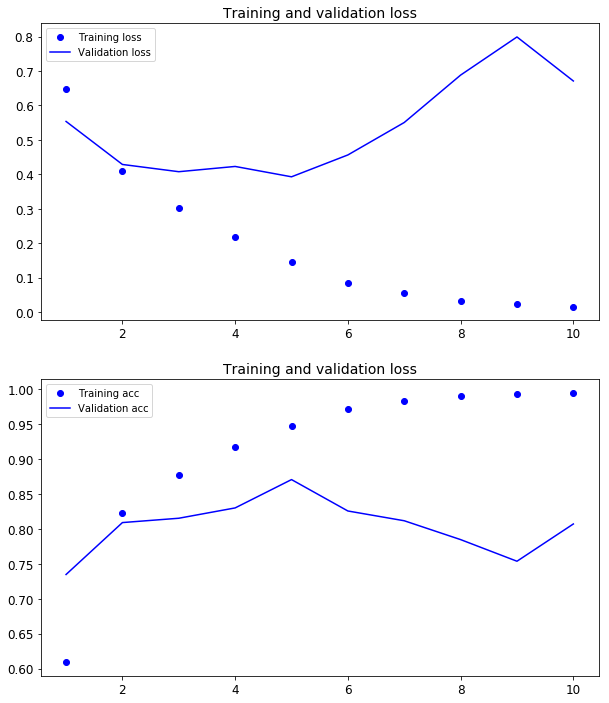

In [8]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes[0].plot(epochs, loss, 'bo', label='Training loss')
axes[0].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0].set_title("Training and validation loss", fontsize=14)
axes[0].legend()

axes[1].plot(epochs, acc, 'bo', label='Training acc')
axes[1].plot(epochs, val_acc, 'b', label='Validation acc')
axes[1].set_title("Training and validation acc", fontsize=14)
axes[1].legend()

plt.show()

> 精度不高的部分原因：  
1. 输入只考虑了前500个单词，而不是整个序列；
2. SimpleRNN不擅长处理长序列，比如文本。

### LSTM——SimpleRNN层的一种变体

In [9]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.5115 - acc: 0.7613 - val_loss: 0.4091 - val_acc: 0.8164
Epoch 2/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.2938 - acc: 0.8844 - val_loss: 0.3486 - val_acc: 0.8772
Epoch 3/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.2370 - acc: 0.9096 - val_loss: 0.3067 - val_acc: 0.8878
Epoch 4/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.1969 - acc: 0.9277 - val_loss: 0.3246 - val_acc: 0.8778
Epoch 5/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1743 - acc: 0.9372 - val_loss: 0.3009 - val_acc: 0.8898
Epoch 6/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1573 - acc: 0.9431 - val_loss: 0.5151 - val_acc: 0.8376
Epoch 7/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.1412 - acc: 0.9505 - val_loss: 0.3500 - val_acc:

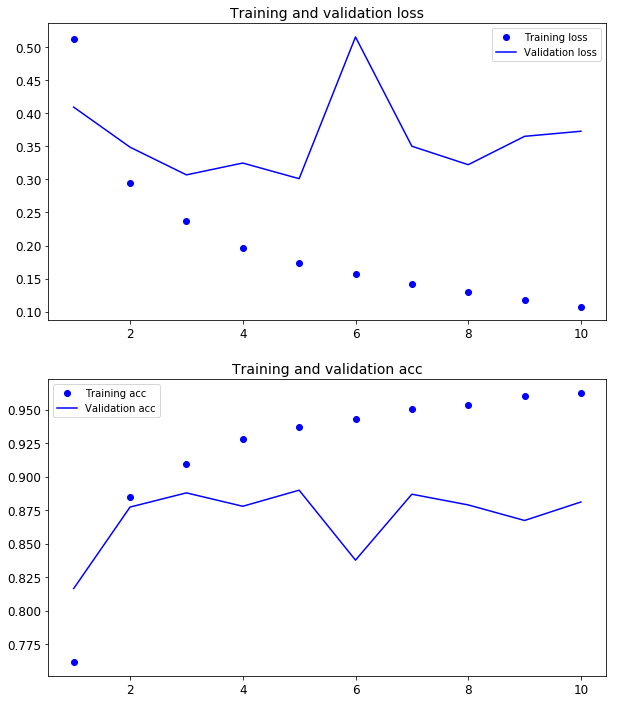

In [13]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes[0].plot(epochs, loss, 'bo', label='Training loss')
axes[0].plot(epochs, val_loss, 'b', label='Validation loss')
axes[0].set_title("Training and validation loss", fontsize=14)
axes[0].legend()

axes[1].plot(epochs, acc, 'bo', label='Training acc')
axes[1].plot(epochs, val_acc, 'b', label='Validation acc')
axes[1].set_title("Training and validation acc", fontsize=14)
axes[1].legend()

plt.show()